# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

1.13.1+cu117


## 1. What are 3 areas in industry where computer vision is currently being used?

Tesla utilizes computer vision for its self-driving cars. There are also other traffic-related applications such as the detection of parking spaces as free or taken. Computer vision can also be used in medicine and health care to detect abnormalities in x-ray scans. Agriculture can also benefit from computer vision to detect insects, diseases in plants, and other abnormalities if desired.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting (and underfitting) are deficiencies in a model that affect their performance. An example of overfitting is when the model performs really well on its training data, but performs badly on new data (testing data). There may be various reasons for such an occurrence, depending on how a model is instantiated. This issue is commonly caused by not having enough training data, the model being too complex, or the data being very noisy (having many outliers and erronous values).

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- Using more training data: With an increase in training data, it's possible to extract patterns and relationships that may not be discovered before
- Cross-validation: Splitting the training data into smaller train/test splits to tune the model with
- Removal or addition of noise: Data that is too noisy with errors will make the model perform poorly, data that is too "flat" (and thus not representative of data that is usually more flexible) may cause issues as well. The removal or addition may make amends if applicable

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Image used:

<img src="images/03_ladybug.png" />

The ladybug image is uploaded into the CNN explainer website. As this neural network expects images in 64x64 pixel format, it is first resized to that size. Then, it is split into 3 separate colour channels based on RGB values. Afterwards, the image goes through several convolution layers, ReLUs, and max pooling layers. 

For each of the neurons in the layer before a convolution layer, a moving window (kernel) slides across the image, performing an element-wise dot product based on image activation values and kernel weights. The result is an activation map, which are summed together with bias values and given to the next layer. The results and how the kernel behaves depend on several hyperparameters such as kernel size, stride, padding, etc. 

A ReLU layer looks at all the activation values and sets negative values to 0, while leaving positive values alone.

A max pooling layer slides another moving window (kernel) across its inputs and spits out an activation map of the highest found values found across each step of the moving window.

Across the convolution layers and max pooling layers, image size is reduced. Compressing the image across the neural network improves performance and allows for the model to better recognize shapes and objects that the input image's subject matter is comprised of. It's also important to note that neurons usually have an activation value between 0 and 1. In a CNN, it's possible for them to exceed this limit due to values being summed together in convolution layers.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [2]:
import torchvision
from torchvision import datasets, transforms

In [3]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [4]:
import matplotlib.pyplot as plt

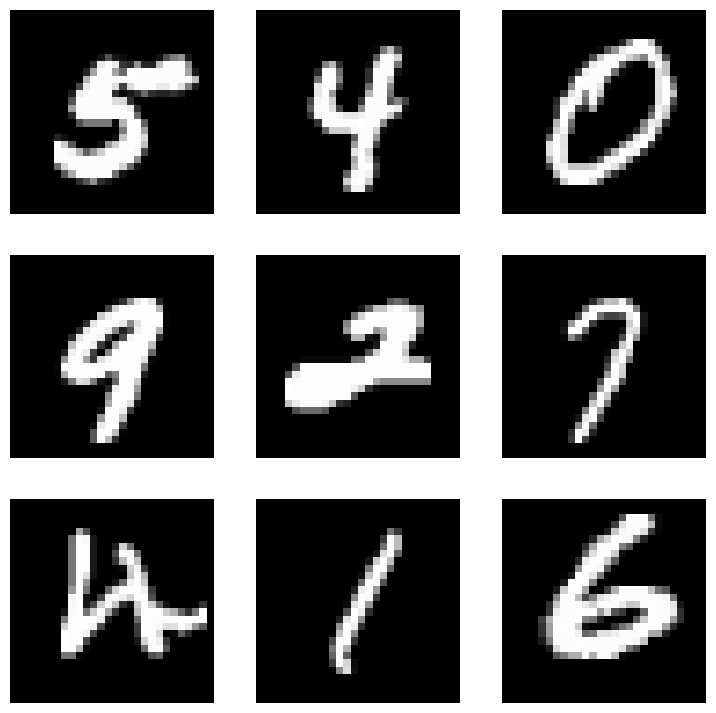

In [5]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
    rnd = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[rnd]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
from torch.utils.data import DataLoader

In [7]:
train_ldr = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_ldr = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [8]:
from torch import nn

In [9]:
train_data[0][0].shape

torch.Size([1, 28, 28])

With padding of 1 on the convolutional layers and 2 max pooling layers, the height and width will be reduced from 28 to 14 to 7. Near the end, these 7x7 images will be flattened, resulting in 49 pixels per image. As there are 10 hidden units, this will result in 490 pixels for that layer. As the model will work with batches of 32 images, this results in 32x490 pixels. The final linear layer in the classifier is of size 10x10 when only supplying the hidden units value. Thus, a multiplication of 7 is twice needed to transform the 10x10 into 70x10 and then into 490x10.

This turns the final computation into 32x490 by 490x10, which is a valid matrix multiplication as the centre values are identical.

In [10]:
class TinyVGG(nn.Module):
    def __init__(self, in_shape: int, hidden_units: int, out_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=in_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=out_shape)
        )
    
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [11]:
model_mnist = TinyVGG(
    in_shape=1,
    hidden_units=10,
    out_shape=len(train_data.classes)
)

## 9. Train the model you built in exercise 8. for 5 epochs.

In [12]:
from torchmetrics import Accuracy

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_mnist.parameters(), lr=0.1)
metric_acc = Accuracy(task="multiclass", num_classes=len(train_data.classes))

In [14]:
torch.manual_seed(42)
epochs = 5
for epoch in range(epochs):
    train_loss, train_acc = 0, 0
    test_loss, test_acc = 0, 0
    model_mnist.train()
    for batch, (X, y) in enumerate(train_ldr):
        y_logits = model_mnist(X)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        loss = loss_fn(y_logits, y)
        train_loss += loss
        train_acc += metric_acc(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    model_mnist.eval()
    with torch.inference_mode():
        for X_, y_ in test_ldr:
            test_logits = model_mnist(X_)
            test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
            test_loss += loss_fn(test_logits, y_)
            test_acc += metric_acc(test_pred, y_)
            
        train_loss /= len(train_ldr)
        train_acc /= len(train_ldr)
        test_loss /= len(test_ldr)
        test_acc /= len(test_ldr)
    
    print(f"Epoch: {epoch}")
    print(f"Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}")
    print(f"Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

Epoch: 0
Train Loss: 0.25495, Train Acc: 0.91
Test Loss: 0.07584, Test Acc: 0.98
Epoch: 1
Train Loss: 0.07490, Train Acc: 0.98
Test Loss: 0.04853, Test Acc: 0.98
Epoch: 2
Train Loss: 0.05977, Train Acc: 0.98
Test Loss: 0.04842, Test Acc: 0.98
Epoch: 3
Train Loss: 0.05144, Train Acc: 0.98
Test Loss: 0.05065, Test Acc: 0.98
Epoch: 4
Train Loss: 0.04566, Train Acc: 0.99
Test Loss: 0.04691, Test Acc: 0.99


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.

In [15]:
model_mnist.eval()
with torch.inference_mode():
    y_preds = []
    for batch, (X, y) in test_ldr:
        y_logit = model_mnist(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=1).argmax(dim=1)
        y_preds.append(y_pred)

In [16]:
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor[:20], test_data.targets[:20]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]))

In [17]:
class_names = train_data.classes

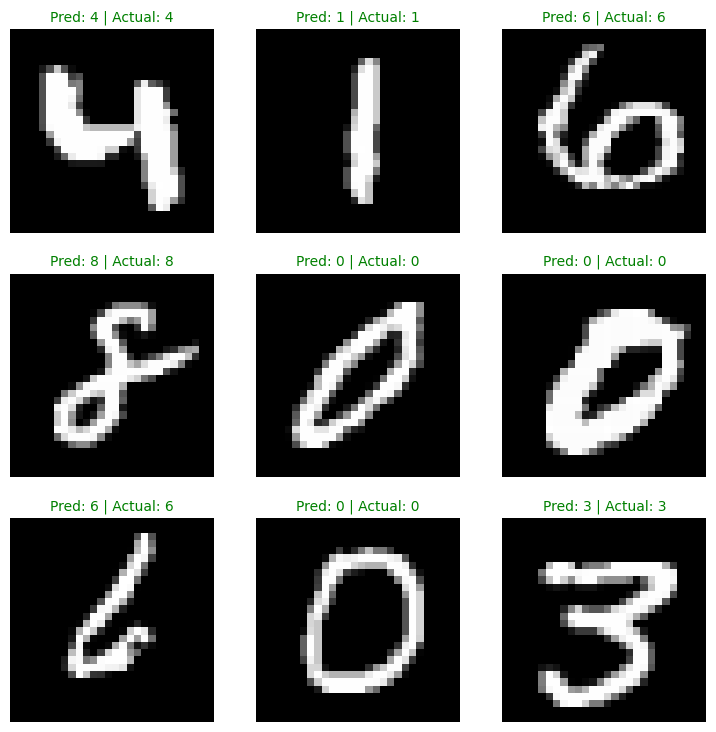

In [18]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
    rnd = torch.randint(0, len(y_preds_tensor), size=[1]).item()
    pred_label = y_preds_tensor[rnd]
    img, actual_label = test_data[rnd]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    title = f"Pred: {pred_label} | Actual: {actual_label}"
    if pred_label == actual_label:
        plt.title(title, fontsize=10, c="g")
    else:
        plt.title(title, fontsize=10, c="r")
    plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [19]:
from torchmetrics import ConfusionMatrix
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

In [20]:
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds_tensor, target=test_data.targets)

In [21]:
confmat_tensor

tensor([[ 976,    0,    1,    0,    0,    0,    1,    1,    1,    0],
        [   0, 1120,    2,    4,    0,    0,    3,    1,    5,    0],
        [   1,    1, 1021,    1,    0,    0,    0,    4,    4,    0],
        [   0,    0,    2, 1003,    0,    2,    0,    0,    2,    1],
        [   0,    0,    1,    1,  961,    0,    2,    1,    2,   14],
        [   1,    0,    0,   18,    0,  871,    1,    0,    0,    1],
        [   3,    2,    0,    1,    1,    2,  947,    0,    2,    0],
        [   0,    1,    5,    6,    0,    1,    0, 1005,    1,    9],
        [   1,    0,    3,    5,    0,    3,    0,    0,  960,    2],
        [   0,    0,    2,   10,    2,    3,    0,    0,    6,  986]])

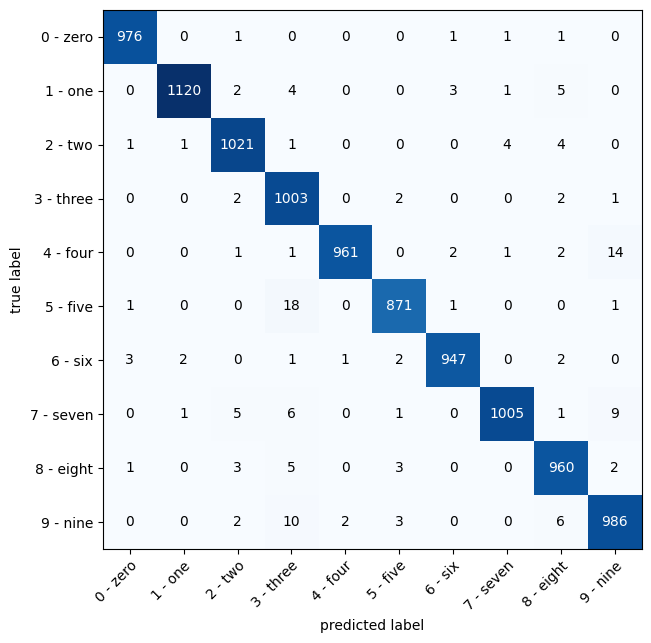

In [22]:
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [23]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [24]:
conv2d_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1)
conv2d_layer(random_tensor).shape

torch.Size([1, 10, 62, 62])

In [25]:
conv2d_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1)
conv2d_layer(random_tensor).shape

torch.Size([1, 10, 60, 60])

In [26]:
conv2d_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=7, stride=1)
conv2d_layer(random_tensor).shape

torch.Size([1, 10, 58, 58])

As the kernel size parameter increases, the output shape of the resulting tensor decreases. This happens as the kernel's window not takes up additional pixel space. An increase in the stride would reduce the resulting dimensions even more. An increase in padding would alleviate the decrease a bit, cushioning the impact or keeping the dimensions the same entirely (depending on hyperparameter).

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [27]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [28]:
class_names = train_data.classes

In [29]:
train_ldr = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_ldr = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

In [30]:
loaded_model = TinyVGG(
    in_shape=1,
    hidden_units=10,
    out_shape=len(class_names)
)
loaded_model.load_state_dict(torch.load("models/03_pytorch_computer_vision_modelv2.pth"))

<All keys matched successfully>

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=loaded_model.parameters(), lr=0.1)
metric_acc = Accuracy(task="multiclass", num_classes=len(train_data.classes))

In [32]:
torch.manual_seed(42)
epochs = 5
for epoch in range(epochs):
    train_loss, train_acc = 0, 0
    test_loss, test_acc = 0, 0
    loaded_model.train()
    for batch, (X, y) in enumerate(train_ldr):
        y_logits = loaded_model(X)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        loss = loss_fn(y_logits, y)
        train_loss += loss
        train_acc += metric_acc(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    loaded_model.eval()
    with torch.inference_mode():
        for X_, y_ in test_ldr:
            test_logits = loaded_model(X_)
            test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
            test_loss += loss_fn(test_logits, y_)
            test_acc += metric_acc(test_pred, y_)
            
        train_loss /= len(train_ldr)
        train_acc /= len(train_ldr)
        test_loss /= len(test_ldr)
        test_acc /= len(test_ldr)
    
    print(f"Epoch: {epoch}")
    print(f"Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}")
    print(f"Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

Epoch: 0
Train Loss: 0.30433, Train Acc: 0.89
Test Loss: 0.32191, Test Acc: 0.88
Epoch: 1
Train Loss: 0.29168, Train Acc: 0.89
Test Loss: 0.30395, Test Acc: 0.89
Epoch: 2
Train Loss: 0.28158, Train Acc: 0.90
Test Loss: 0.28971, Test Acc: 0.89
Epoch: 3
Train Loss: 0.27216, Train Acc: 0.90
Test Loss: 0.29652, Test Acc: 0.89
Epoch: 4
Train Loss: 0.26373, Train Acc: 0.90
Test Loss: 0.28544, Test Acc: 0.90


In [33]:
loaded_model.eval()
with torch.inference_mode():
    y_preds = []
    for batch, (X, y) in test_ldr:
        y_logit = loaded_model(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=1).argmax(dim=1)
        y_preds.append(y_pred)

In [34]:
y_preds_tensor = torch.cat(y_preds)

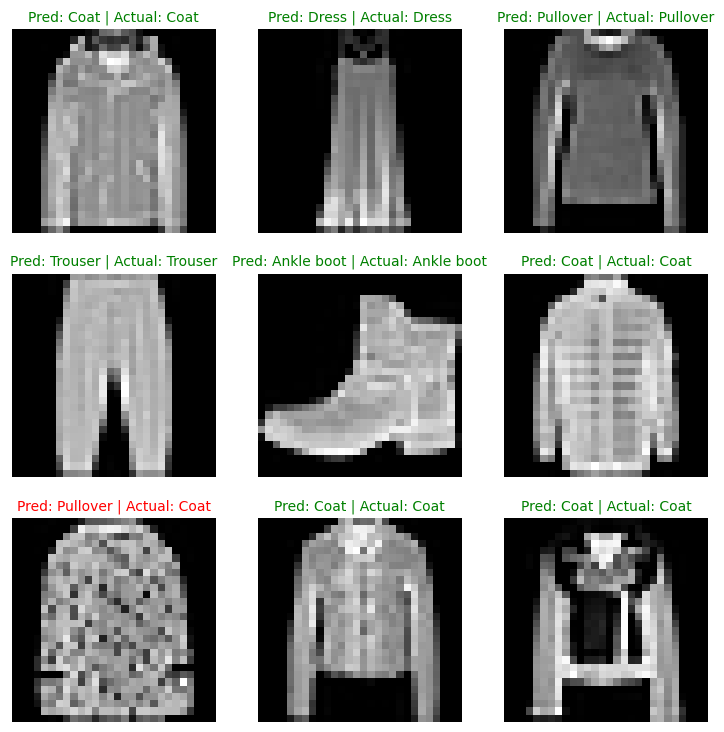

In [35]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
    rnd = torch.randint(0, len(y_preds_tensor), size=[1]).item()
    pred_label = class_names[y_preds_tensor[rnd]]
    actual_label = class_names[test_data[rnd][1]]
    img = test_data[rnd][0]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    title = f"Pred: {pred_label} | Actual: {actual_label}"
    if pred_label == actual_label:
        plt.title(title, fontsize=10, c="g")
    else:
        plt.title(title, fontsize=10, c="r")
    plt.axis(False);

Random visualizations, but the cause of wrong predictions was already clear in the computer vision Notebook file. Some of the images are visually very similar to others, but the label will be different. The dataset contains multiple types of shoes, legwear, or shirts. Sometimes the model will simply make mistakes due to these similarities.